# Assignment A2 - Visualization

Course "Data processing and Visualization", IE500417, NTNU. Fall 2022


https://www.ntnu.edu/studies/courses/IE500417

**Note: plagiarism is strictly forbidden! You should never copy any source code from other students. If you use any code written by others (except the standards libraries: NumPy, SciPy, Pandas, etc), provide a reference.**

**If the teachers see that your work is mostly copy+paste from online code snippets, the grade can be reduced.**

**If a case of plagiarism is detected, it will be reported to the administration.**

## Task description

The goal of this assignment is to get familiar with visualization options.

You can choose whichever visualization tools work best for you. Suggested toolset: either [Plotly](https://plot.ly/python/) or [Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html). Check the notebooks on Blackboard Week 02 with examples.

## Submission details (Same as A1)

The assignment must be handed in on Blackboard. The following must be handed in:
1. Report in HTML or PDF format describing the results of this assignment. Preferably, it is generated from the Jupyter notebook you used (Hint: In Jupyter: File > Download as > HTML). Alternatively (if you use plain Python or other tools), prepare a readable report that contains figures and source code snippets necessary to understand your work.
2. Source code that you used to generate the results. This could be the the Jupyter notebook file, python source files, Matlab files, etc.

Deadlines and grading information on Blackboard.

## Detailed steps

First the imports

In [2]:
import pandas as pd

Now do the imports necessary for your visualization tools (MatPlotLib, Plotly, or whatever you use)

**TASK FOR YOU**:

In [3]:
# Your code here - do the imports
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams.update({'font.size': 18})

We will use data set on olympic game results. The data set comes from [Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/version/2). Hint: you can look at different data processing solutions by other people there. Just remember that this work is your individual contribution!

In [4]:
olympics = pd.read_csv("athlete_events.csv")
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Task 1: Inspect the columns

Always when you work with data, it is important to find out first what kind of data are you working with. How many rows are there, how many columns? What are column types, are there any empty values?

One thing that you can always do: get quick statistics using the `.describe()` method. That gives the first impression of the values.

In [5]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Another typical issue: missing values. In the snapshot above we see that some cells have value NaN. It means "not a number", i.e, the value is missing.

Pandas DataFrame has method `.isnull()`. Use it to find out which columns have empty values. 

**TASK FOR YOU**:

In [6]:
# Your code here
import pprint
#First lets just check which columns are null
null_columns = pd.isnull(olympics).any()
null_columns = null_columns[null_columns].index.tolist()
print(null_columns)

# It may be worth seeing how many datapoints are null, for each column. We know from the count above, that there are 271116
# rows in total (by selecting any of the non null columns). We don't really care about the specific numbers, 
# just a percentage.
total_count = 271116

null_stats = []
for column in null_columns:
    percentage = int(((total_count - olympics[column].count()) / total_count) * 100 )
    null_stats.append("{col} has {percentage}% null values".format(col=column, percentage=percentage ))
    
pprint.pprint(null_stats)

# We can infer that the number of null Medal values is high because the participation medal isn't included. That's fine.
# We could possibly remove all null values of age because it's so low. The best thing to do would be to give everyone who
# is ageless an average age, perhaps based on country. 
# We could also guess peoples height based on average weight and age for their nationality.
# We could also guess peoples weight based on average height and age for their nationality.

# Out of interest, how many have both weight and height null values...
hn = olympics[olympics.Height.isnull()]
ln = hn[hn.Weight.isnull()]
print("{0}% of rows for which Height is null, Weight is also null.".format(int(len(ln)/len(hn)*100)))

# ... most! So we could calculate weight and height based on average age and sport for their nationality.

# Unsure if the question wants us to perform any cleaning on the data, or just analyse the results,
# but I've leaft the dataset as it is and will perform any cleaning needed in exercises below. 

['Age', 'Height', 'Weight', 'Medal']
['Age has 3% null values',
 'Height has 22% null values',
 'Weight has 23% null values',
 'Medal has 85% null values']
97% of rows for which Height is null, Weight is also null.


***Your answer here (in case you need an explanatory comment in addition to code)***
I have created a pandas series with all the column names, and whether or not they contain null values. I've then filtered the time serieis with itself to obtian only the columns with null values and converted by index (column names) to list.

### Task 2: Clarify attribute types

Before you visualize data, you should check what types do the attributes have. Your task: inspect all the columns and for each of them clarify: is this attibute quantitative, ordinal or categorical?

Store the names of all categorical attributes in a list and call it `categories`. In a similar fashion, store ordinal attribute names in a variable named `ordinals` and quantitative attribute names in `quants`.

For example, if you think that attributes age and height are categorical while year and team are quantitative, your variables should be:

```
categories = ["Age", "Height"]
quants = ["Year", "Team"]
ordinals = []
```

**TASK FOR YOU**:

In [7]:
# Your code here

# We'll just iterate the column and do some statistics, which we can then use to inform what the attributes could be. 
for index in olympics:
    print("{}:\n".format(index))
    print("Datatype: {}".format(olympics[index].dtypes))
    print("No of unique values: {}".format(len(olympics[index].unique())))
    print("Sample values: {}".format(olympics[index].dropna().sample(n=5).values))
    print("\n")
    
categories = ["Sex", "Team", "NOC", "Games", "Season", "City", "Sport", "Event"]
quants = ["Age", "Height", "Weight", ] # All the quants could be ordinal if they were sorted into bins, e.g weight ranges.
ordinals = ["Medal"] # A medal could be both categorical, or ordinal i.e Bronze > Silver > Gold (or 1 -> 2 -> 3)
designator = ["ID", "Name"]

ID:

Datatype: int64
No of unique values: 135571
Sample values: [  5650 121906  65839  81495   7059]


Name:

Datatype: object
No of unique values: 134732
Sample values: ['Nikolay Yefimovich Andrianov' 'Markus Raeside "Mark" Rowand' 'Li Na'
 'Mihovil Dori' 'Franois Hamelin']


Sex:

Datatype: object
No of unique values: 2
Sample values: ['M' 'M' 'M' 'F' 'F']


Age:

Datatype: float64
No of unique values: 75
Sample values: [24. 18. 22. 16. 30.]


Height:

Datatype: float64
No of unique values: 96
Sample values: [180. 162. 183. 180. 172.]


Weight:

Datatype: float64
No of unique values: 221
Sample values: [52. 76. 75. 74. 95.]


Team:

Datatype: object
No of unique values: 1184
Sample values: ['North Korea' 'Italy' 'Uzbekistan' 'Czechoslovakia' 'Ireland']


NOC:

Datatype: object
No of unique values: 230
Sample values: ['SLO' 'ITA' 'KOR' 'NED' 'BAR']


Games:

Datatype: object
No of unique values: 51
Sample values: ['2012 Summer' '2008 Summer' '1936 Summer' '1980 Summer' '1988 Summer']


### Task 3: Display Nordic gold

In this step you will visualize gold medals for Nordic countries. First, we select data for each country (this is just one option, there are many ways to do it).

In [8]:
# Comment: This returns a filter: a list with boolean (true/false) values for each row: true if the country code is "NOR":
# olympics["NOC"] == "NOR"
# This selects only those rows from the dataframe, where the filter says "True" in the corresponding row:
# olympics[olympics["NOC"] == "NOR"]
# etc...

nor = olympics[olympics["NOC"] == "NOR"]
swe = olympics[olympics["NOC"] == "SWE"]
den = olympics[olympics["NOC"] == "DEN"]
fin = olympics[olympics["NOC"] == "FIN"]
isl = olympics[olympics["NOC"] == "ISL"]

**Task 3.1: Visualize total number of gold medals per Nordic country, in a single plot.**

Use a single figure that shows these two attributes: a country and number of medals (for a particular country). When you choose the type of chart, keep in mind the attribute types that you are visualizing!

**TASK FOR YOU**:

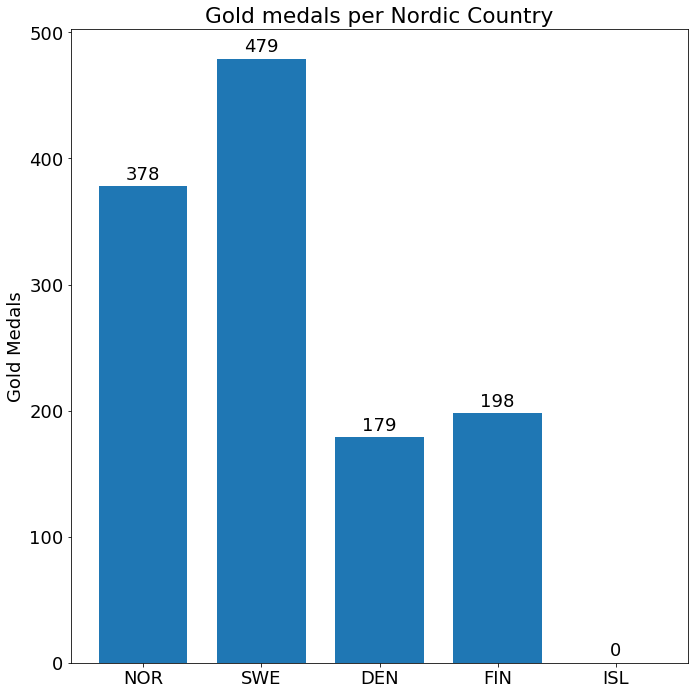

In [9]:
# Your code here
# A bar chart is probably the easiest choice as we have discrete categories.
nordic = [nor, swe, den, fin, isl]
medals = []
labels = []
for nord in nordic:
    medals.append(len(nord[nord.Medal == "Gold"]))
    labels.append(nord.NOC.iloc[0])

x = np.arange(len(labels))
width = 0.75

fig, ax = plt.subplots(figsize=(10,10))
plot = ax.bar(x, medals, width)

ax.set_ylabel('Gold Medals')
ax.set_title('Gold medals per Nordic Country')
ax.set_xticks(x, labels)

ax.bar_label(plot, padding=3)

fig.tight_layout()

plt.show()

The next task is to show one more attribute: Season. You should show the total number of medals per Nordic country, but separated by season. I.e, how many medals has Norway got in Summer Olympics, how many in Winter olympics; how many gold medals has Sweden got in Winter Olympics, how many in Summer, etc. Think about the "Season" attribute - what type does it have and what channel would be appropriate to visualize it?

**Task 3.2: Visualize total number of gold medals per Nordic country, per season.**

**TASK FOR YOU**:

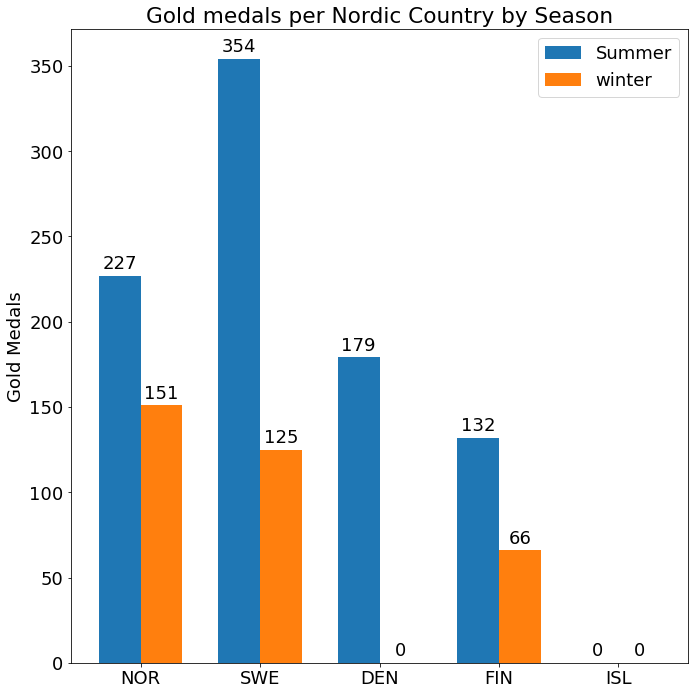

In [10]:
# Your code here
summer_medals = []
winter_medals = []
labels = []
for nord in nordic:
    summer_medals.append(len(nord[(nord.Season == "Summer") & (nord.Medal == "Gold")]))
    winter_medals.append(len(nord[(nord.Season == "Winter") & (nord.Medal == "Gold")]))
    labels.append(nord.NOC.iloc[0])

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,10))
summer_plot = ax.bar(x - width/2, summer_medals, width, label="Summer")
winter_plot = ax.bar(x + width/2, winter_medals, width, label="winter")

ax.set_ylabel('Gold Medals')
ax.set_title('Gold medals per Nordic Country by Season')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(summer_plot, padding=3)
ax.bar_label(winter_plot, padding=3)

fig.tight_layout()

plt.show()

**Task 3.3: Reflect/explain: why did you choose these chart types? What marks and channels are they using to convey the information of each attribute?**

**TASK FOR YOU**:

*Your reflection here*
The main and obvious choices for types of graphs are line, scatter, bar and pie charts. 
Since the number of medals is quantitative, and limitless, pie charts are less suitable. (If we wanted to know how many medals each country has in relation to the total number of medals in Scandinavia, we could use a pie chart).
Since the x-axis is a list of countries (catagorical), a line or scatter graph is not suited for displaying this type of data.
A bar chart is best for displaying categorical data where the y-value is quantitative, and allows you to easily compare each category.

## Task 4: Visualize trend

Visualize number of women participating in the Olympics (with or without medals) over the years in a single chart. 

**TASK FOR YOU**:

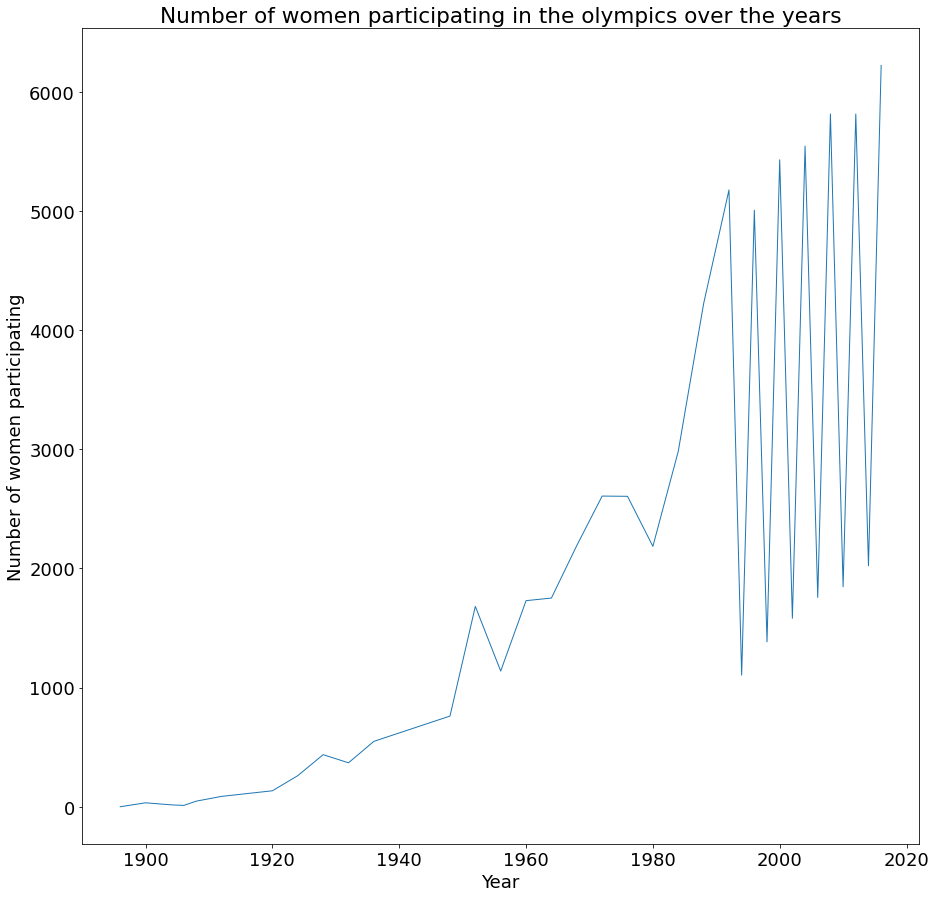

In [11]:
# Your code here
# plt.style.use('_mpl-gallery')

x = []
y = []
for year, olympics_year in  olympics.groupby("Year"):
    x.append(year)
    y.append(len(olympics_year[olympics_year.Sex == 'F']))

# Plot
fig, ax = plt.subplots(figsize=(15,15))

ax.set_title('Number of women participating in the olympics over the years')
ax.set_ylabel('Number of women participating')
ax.set_xlabel('Year')
ax.plot(x,y, linewidth=1.0)

plt.show()


**TASK FOR YOU: The chart probably will have som weird spikes towards the end. Do some analysis to understand what it means and why does it appear.**

Your reflection here

In [12]:
# Lets define some statistics per year (example, how many Games ran, how many cities have been involved etc).

stats = []
for year, olympics_year in  olympics.groupby("Year"):
    year_stats = {}
    year_stats['Year'] = year
    year_stats['Athletes'] = len(olympics_year['ID'].unique())
    year_stats['Seasons'] = olympics_year['Season'].unique()
    year_stats['Cities'] = len(olympics_year['City'].unique())
    year_stats['NOC'] = len(olympics_year['NOC'].unique())
    year_stats['Sports'] = len(olympics_year['Sport'].unique())
    year_stats['Teams'] = len(olympics_year['Team'].unique())
    stats.append(year_stats)

pd.DataFrame(data=stats)

,Year,Athletes,Seasons,Cities,NOC,Sports,Teams
0,1896,176,[Summer],1,12,9,18
1,1900,1224,[Summer],1,31,20,190
2,1904,650,[Summer],1,15,18,79
3,1906,841,[Summer],1,21,13,52
4,1908,2024,[Summer],1,22,24,73
5,1912,2409,[Summer],1,29,17,102
6,1920,2676,[Summer],1,29,25,72
7,1924,3565,"[Summer, Winter]",2,46,30,93
8,1928,3703,"[Summer, Winter]",2,46,25,85
9,1932,2174,"[Summer, Winter]",2,47,25,72


From the analysis above, after 1992, the summer and winter olympics were separated out by season with a two year gap. Typically the Summer Olympics is larger than the winter olympics, with more athletes and teams competing (this is also supported by the analysis). This will explain the spikey shape of the graph.

**TASK FOR YOU: Find a reasonable way to aggregate the data to get the overall trend over the years. I.e., get rid of the spikes.**

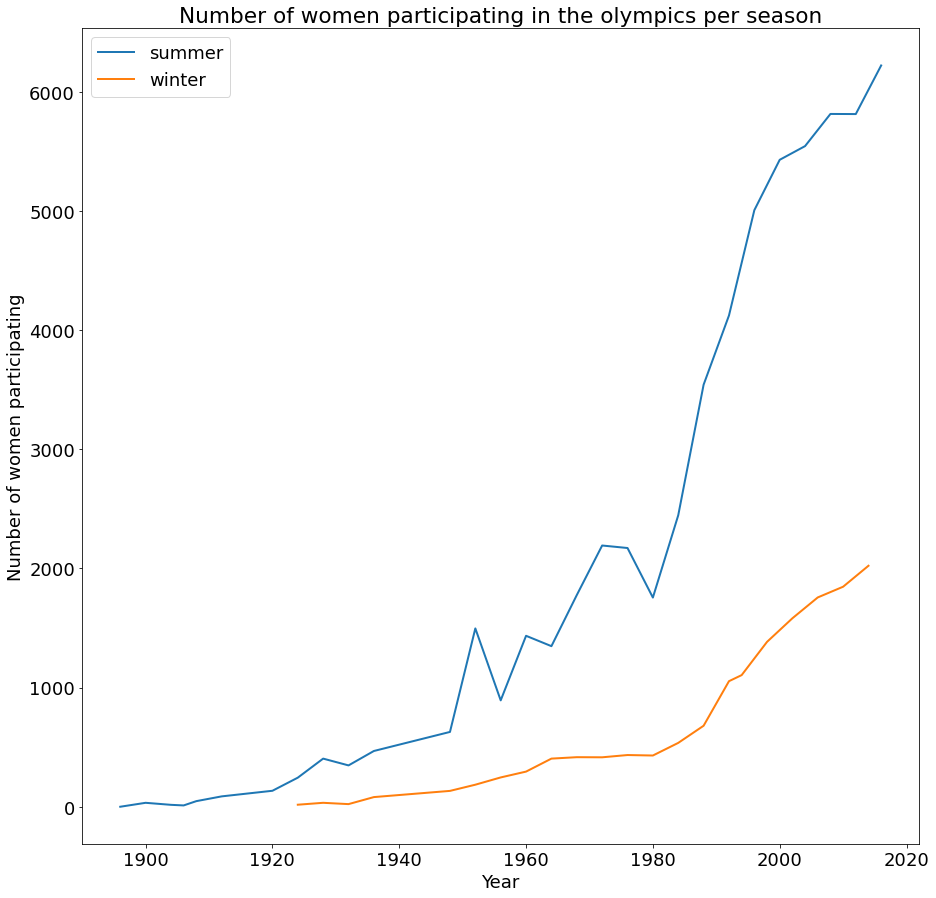

In [13]:
# Your code here
# We could probably treat the summer and winter olypics as separate entities.

# Define the plot
fig, ax = plt.subplots(figsize=(15,15))

ax.set_title('Number of women participating in the olympics per season')
ax.set_ylabel('Number of women participating')
ax.set_xlabel('Year')

# Create the data for the plot
for season, olypic_season in olympics.groupby("Season"):
    x = []
    y = []
    for year, olympics_year in  olypic_season.groupby("Year"):
        x.append(year)
        y.append(len(olympics_year[olympics_year.Sex == 'F']))
    ax.plot(x,y, linewidth=2.0, label=season.lower())
    ax.legend()

plt.show()

**Your reflection here - Explain why your approach makes sense.**
Whilst not strictly an aggregation, separating out the summer and winter olympics makes sense as not every olympic year had winter olympics, so the yearly figures would offset for years combining the winter games or years in the absence of winter games. Separating them out makes the trends clearer for both seasons. I think this is more transparent (and easier) than trying to combine both seasonal games, as this could potentially obfuscate trends in a particular season. 

## Task 5: Visualize statistics

Sometimes you want to look at distribution of values for an attribute. There are several choices. [Histogram](https://en.wikipedia.org/wiki/Histogram) is one of them. Idea of histogram: we split the value range into intervals of specific size and count how many attributes have value that fits within each interval. 

**Task 5.1: Show histogram of weight for all gold medal winners in the WINTER season.**

**TASK FOR YOU**:

(array([ 16.,  98., 346., 392., 379., 260., 111.,  21.,   6.,   2.]),
 array([ 36. ,  45.4,  54.8,  64.2,  73.6,  83. ,  92.4, 101.8, 111.2,
        120.6, 130. ]),
 <BarContainer object of 10 artists>)

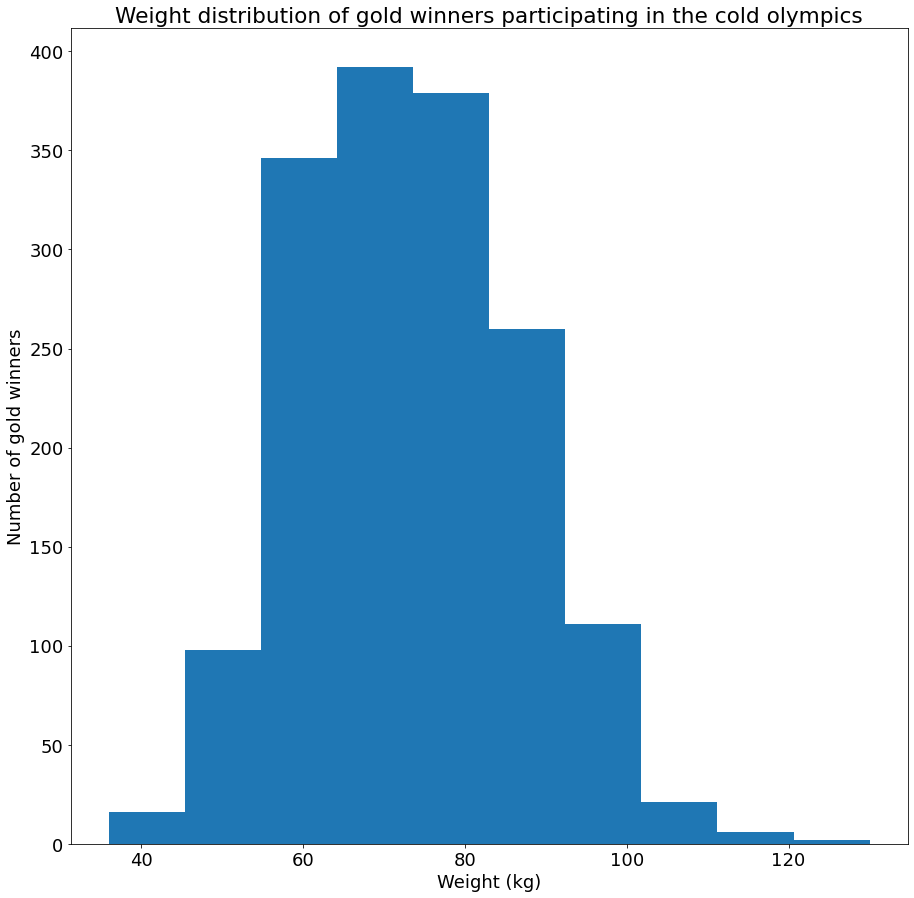

In [14]:
# Your code here
# Selecting the cold gold weights
olympics_gold = olympics[(olympics.Medal == "Gold") & (olympics.Season == "Winter")]["Weight"].dropna().tolist()

# Choosing a sensible number of bins of around 10, which can be adjusted later after inspecting the results.
# ... 10 seems fine.
n_bins = 10

# Putting them in bins
fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('Weight distribution of gold winners participating in the cold olympics')
ax.set_ylabel('Number of gold winners')
ax.set_xlabel('Weight (kg)')
ax.hist(olympics_gold, n_bins)

**Task 5.2: Show histogram of weight for all gold medal winners in the SUMMER season.** Note: the histogram should be comparable with the WINTER histogram.

**TASK FOR YOU**:

(array([  13.,   65.,  191.,  647., 1254., 1548., 1589., 1285.,  931.,
         556.,  327.,   85.,   64.,   30.,   15.,    8.,    6.,    2.,
           4.,    3.]),
 array([ 28. ,  35.1,  42.2,  49.3,  56.4,  63.5,  70.6,  77.7,  84.8,
         91.9,  99. , 106.1, 113.2, 120.3, 127.4, 134.5, 141.6, 148.7,
        155.8, 162.9, 170. ]),
 <BarContainer object of 20 artists>)

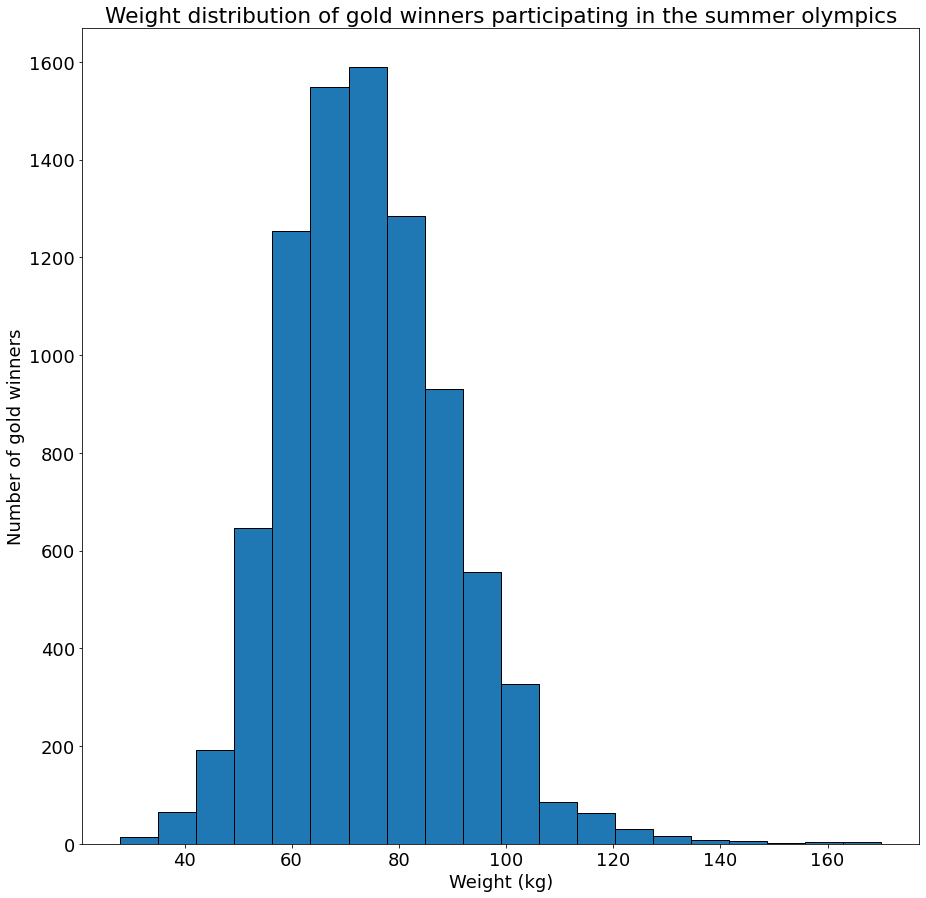

In [15]:
# Your code here

# Selecting the summer gold weights
olympics_gold = olympics[(olympics.Medal == "Gold") & (olympics.Season == "Summer")]["Weight"].dropna().tolist()

# Choosing a sensible number of bins of around 10, which can be adjusted later after inspecting the results.
n_bins = 20
# ... 20 seems better.

# Putting them in bins
fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('Weight distribution of gold winners participating in the summer olympics')
ax.set_ylabel('Number of gold winners')
ax.set_xlabel('Weight (kg)')
ax.hist(olympics_gold, n_bins, ec='black')

## Task 6: Visualize trend of statistics (a bit more challenging)

In this task you will visualize how one attribute varies over time. But instead of visualizing a single value, we will look at the statistics.

First, we calculate Body Mass Index for all participants. Formula: BMI = Weight / (Height * Height)

In [28]:
olympics["BMI"] = olympics["Weight"] / (olympics["Height"] ** 2)

Your task is to group the entries by year, for each year show the statistics of BMI: the mean BMI value and the range of values. There are different options available, including:
- Show a box plot for each year
- Show [Bollinger Bands (R)"](https://en.wikipedia.org/wiki/Bollinger_Bands) for the BMI variable. Bollinger Bands is typically used in finance. But it uses statistical concepts in the core: a moving average line shown in the middle, upper and lower bands shown as the mean +/- two standard deviations.
- Be creative! :)

Note: the idea is to show this in a single plot. Don't create a separate box plot for every year.

Some inspirational examples from a [Kaggle solution by Marco Giuseppe de Pinto](https://www.kaggle.com/marcogdepinto/let-s-discover-more-about-the-olympic-games)): 
<img src="files/stats-plot-example.jpg">

<img src="files/boxplots-example.jpg">

**TASK FOR YOU**:

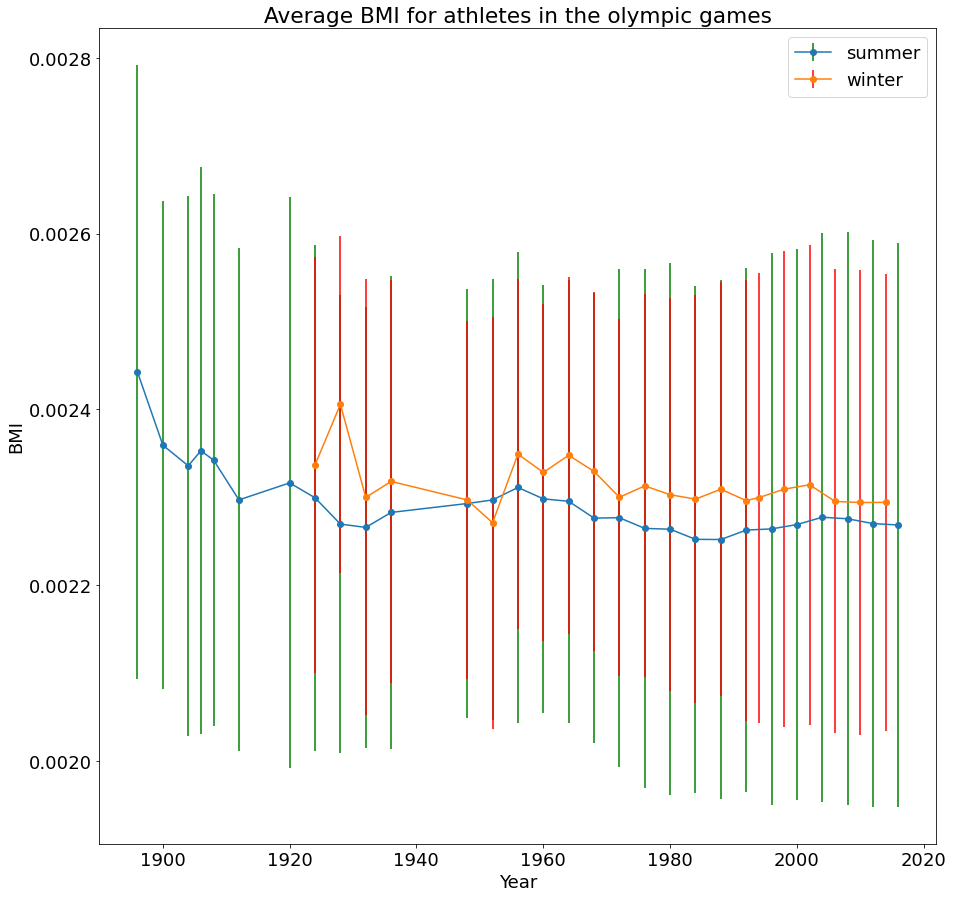

In [57]:
# Your code here
mean_s = []
std_s = []
year_s = []
mean_w = []
std_w = []
year_w = []

# Get rid of nans in the BMI
olympics_cleaned = olympics.dropna(subset = ["BMI"])

# In keeping with the summer/ winter theme
olympics_summer = olympics_cleaned[olympics_cleaned['Season'] == 'Summer']
olympics_winter = olympics_cleaned[olympics_cleaned['Season'] == 'Winter']

for yr, olympics_year in olympics_summer.groupby("Year"):
    mean_s.append(olympics_year["BMI"].mean())
    std_s.append(olympics_year["BMI"].std())
    year_s.append(yr)
    
for yr, olympics_year in olympics_winter.groupby("Year"):
    mean_w.append(olympics_year["BMI"].mean())
    std_w.append(olympics_year["BMI"].std())
    year_w.append(yr)

data = pd.DataFrame({'year': year, 'mean': mean, 'std': std})

fig, ax = plt.subplots(figsize=(15,15))

plt.errorbar(year_s, mean_s, std_s, marker='o', ecolor="green", label="summer")
plt.errorbar(year_w, mean_w, std_w, marker='o', ecolor="red", label="winter")
ax.set_title('Average BMI for athletes in the olympic games')
ax.set_xlabel('Year')
ax.set_ylabel('BMI')
ax.legend()




## Reflection

Please reflect on the following questions:
1. How did the assignment go? Was it easy or hard?
Relatively easy
2. How many hours did you spend on it?

3. What was the most time-consuming part?
4. If you need to do similar things later in your professional life, how can you improve? How can you do it more efficiently?
5. Was tehre something you would expect to learn that this exercise did not include?
6. Was there something that does not make sense?